ref: https://docs.scvi-tools.org/en/stable/tutorials/notebooks/MultiVI_tutorial.html

## Import modules

In [1]:
import scvi
import anndata
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

scvi.settings.seed = 420
scvi.settings.num_threads = 24

In [2]:
import session_info
session_info.show()

In [3]:
path_adata = '/nfs/team205/heart/anndata_objects/'
directory = path_adata + 'MultiVI'
adata_mvi=sc.read_h5ad(directory + '/adata_post-multivi_full_2021_10_06.h5ad')

In [4]:
df_obs = pd.read_csv(directory + '/adata_mvi.obs.csv', index_col=0) 
df_obs = df_obs[['n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score',
                 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval']]

if df_obs.index.equals(adata_mvi.obs.index):
    adata_mvi.obs = pd.concat([adata_mvi.obs, df_obs], axis=1).copy()

/opt/conda/envs/multiVI/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,8,9,18,22,29,31,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
adata_mvi

AnnData object with n_obs × n_vars = 697649 × 120303
    obs: 'modality', 'donor_cellnuc', 'donor', 'region', 'cell_or_nuclei', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'modality'
    uns: '_scvi'
    obsm: 'MultiVI_latent', '_scvi_extra_categoricals', 'latent_gene_encoding'
    layers: 'binary_raw'

In [6]:
mvi = scvi.model.MULTIVI.load(directory + "/trained_multivi_full_2021_10_06", adata_mvi)

INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels',     
         'cat_covs']                                                                         
INFO     Successfully registered anndata object containing 697649 cells, 120303 vars, 3      
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


In [7]:
sc.pp.neighbors(adata_mvi, use_rep="MultiVI_latent")
sc.tl.umap(adata_mvi, min_dist=0.2)

/opt/conda/envs/multiVI/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'scrublet_leiden' as categorical


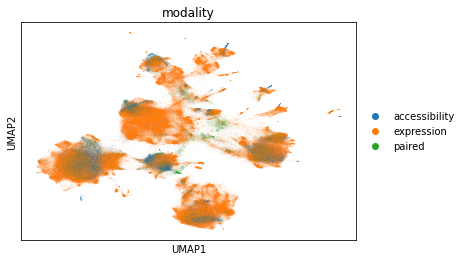

In [8]:
sc.pl.umap(adata_mvi, color=['modality'], save='_modality.pdf')

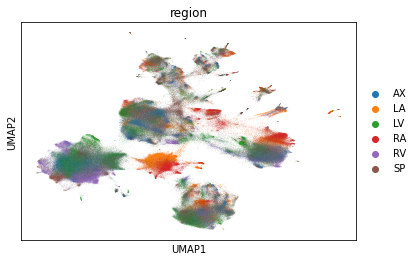

In [9]:
sc.pl.umap(adata_mvi, color=['region'], save='_region.pdf')

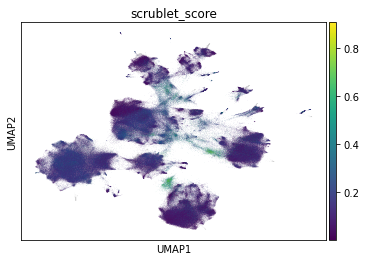

In [14]:
sc.pl.umap(adata_mvi, color=['scrublet_score'], save='_scrublet_score.pdf')

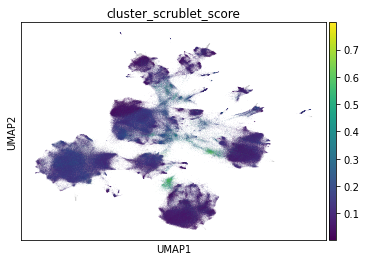

In [17]:
sc.pl.umap(adata_mvi, color=['cluster_scrublet_score'], save='_cluster_scrublet_score.pdf')

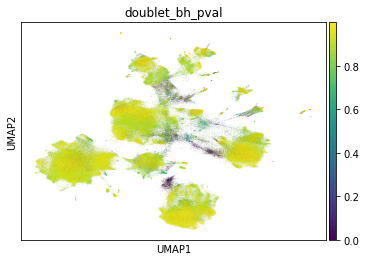

In [19]:
sc.pl.umap(adata_mvi, color=['doublet_bh_pval'], save='_doublet_bh_pval.pdf')

In [20]:
adata_mvi

AnnData object with n_obs × n_vars = 697649 × 120303
    obs: 'modality', 'donor_cellnuc', 'donor', 'region', 'cell_or_nuclei', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'modality'
    uns: '_scvi', 'neighbors', 'umap', 'modality_colors', 'region_colors', 'scrublet_leiden_colors'
    obsm: 'MultiVI_latent', '_scvi_extra_categoricals', 'latent_gene_encoding', 'X_umap'
    layers: 'binary_raw'
    obsp: 'distances', 'connectivities'

In [21]:
sc.tl.leiden(adata_mvi, resolution = 2.0)

In [22]:
adata_mvi

AnnData object with n_obs × n_vars = 697649 × 120303
    obs: 'modality', 'donor_cellnuc', 'donor', 'region', 'cell_or_nuclei', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'leiden'
    var: 'modality'
    uns: '_scvi', 'neighbors', 'umap', 'modality_colors', 'region_colors', 'scrublet_leiden_colors', 'leiden'
    obsm: 'MultiVI_latent', '_scvi_extra_categoricals', 'latent_gene_encoding', 'X_umap'
    layers: 'binary_raw'
    obsp: 'distances', 'connectivities'

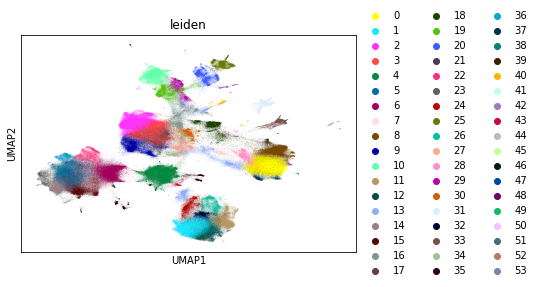

In [23]:
sc.pl.umap(adata_mvi, color=['leiden'], save='_leiden.pdf')

In [24]:
adata_mvi.obs.leiden.cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53'],
      dtype='object')

In [25]:
markers = {
    'vCM': ['MYH7', 'MYL2', 'FHL2'],  # Coarse
    'aCM': ['NPPA', 'MYL7', 'MYL4'], # Coarse
    'FB': ['DCN', 'GCN', 'PDGFRA'], # Coarse
    'EC': ['VWF', 'PECAM1', 'CDH5'], # Coarse
    'Peri': ['RGS5', 'ABCC9', 'KCNJ8'], # Coarse
    'SMC': ['MYH11', 'TAGLN', 'ACTA2'], # Coarse
    'Meso': ['MSLN', 'WT1', 'BNC1'], # Coarse
    'Neuro': ['PLP1', 'NRXN1', 'NRXN3'], # Coarse
    'Adipo': ['GPAM', 'FASN'], # Coarse
    # Myeloids
    'Mono': ['ITGAM','CCR2','VCAN','CD14'], 
    'MP':['CD68','MERTK','MRC1','LYVE1'],
    'DC': ['HLA-DRA','HLA-DRB1','HLA-DPB1','CLEC9A'],
    'NØ': ['MPO','S100A9','S100A8','BASP1'],
    'Mast': ['KIT','TPSAB1','CMA1'],
    'CD14+Mo': ['CD14'],
    'CD69+Mo': ['CD69'],
    'nøMo': ['FCN1'],
    'Mø': ['CD68','MERTK','MRC1'],
    'MoMø': ['CD68','MERTK','MRC1'],
    'DOCK4+MØ': ['DOCK4'],
    'LYVE1+MØ': ['LYVE1'],
    'TREM2+MØ': ['TPRG1','MITF'],
    'proIMØ': ['CENPP','NSD2'],
    'M2MØ': ['RGS1','CLEC10A'],
    'DC2': ['HLA-DRB1','HLA-DPB1','CPVL','IRF8'],
    # Lymphoids
    'B': ['CD19','CD79A','CD79B'],
    'B_plasma': ['IGHM','IGHG1','IGHA1'],
    'T':['CD3E','CD3D'],
    'CD4+T': ['CD4'],
    # 'CD4+T_Tfh': ['CD3E','CD4','BCL6'],
    # 'CD4+T_Th1': ['CD3E','CD4','TBX21'],
    # 'CD4+T_Th17': ['CD3E','CD4','RORC'],
    # 'CD4+T_Th2': ['CD3E','CD4','GATA3'],
    'CD4+T_act': ['IL2'],
    'CD4+T_naive': ['CCR7','TCF7','SELL'],
    'CD4+T_reg': ['FOXP3', 'CTLA4', 'IL2RA', 'IKZF2'],
    'CD8+T': ['CD8A','CD8B'],
    'CD8+T_cytox': ['PRF1','GZMA','GZMB','NKG7'],
    'CD8+T_em': ['IL7R','RUNX2'],
    'CD8+T_te': ['IFNG', 'CD69', 'TIGIT', 'LAG3'],
    'CD8+T_trans': ['GZMK','TOX'],
    'MAIT-like': ['SLC4A10','CCR6'],
    'gdT': ['TRGC1','TRDC'],
    'NK': ['KLRF1','KLRD1','FCGR3A','NCAM1'],
    'ILC': ['KIT','IL18R1'],     
    'Cycling': ['MKI67','TOP2A'],
}

In [26]:
imputed_expression = mvi.get_normalized_expression()

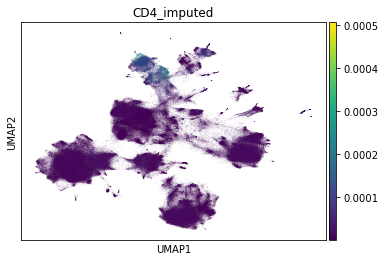

In [27]:
gene_idx = np.where(adata_mvi.var.index == "CD4")[0]
adata_mvi.obs["CD4_imputed"] = imputed_expression[:, gene_idx]
sc.pl.umap(adata_mvi, color='CD4_imputed')

In [28]:
len(markers.keys())

42